In [48]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Data path to the raw data
DATA_PATH = Path("../data/processed/Clean_Customer-Churn-Dataset.csv")
print(DATA_PATH.resolve())  # Prints the full absolute path
print(DATA_PATH.exists())   # Should return True

/workspace/PowerBI-Customer-Churn-Analysis/data/processed/Clean_Customer-Churn-Dataset.csv
True


In [50]:
try:
    df = pd.read_csv(DATA_PATH)
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {DATA_PATH}")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [51]:
# Display descriptive statistics for numerical columns
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.515689,0.419566
std,0.368612,24.559481,30.090047,2265.270398,1.275299,1.250117
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


In [52]:

# Display descriptive statistics for categorical columns
display(df.describe(include='object'))

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Based on the outputs, we can infer the following about the dataset:

**From `df.describe()` (for numerical columns):**

*   **SeniorCitizen:** The mean is 0.162, indicating that about 16.2% of the customers in the dataset are senior citizens.
*   **tenure:** The average tenure is about 32.37 months, with a standard deviation of 24.56 months, suggesting a wide range in customer tenure. The minimum tenure is 0 months, and the maximum is 72 months.
*   **MonthlyCharges:** The average monthly charge is about $64.76, with a standard deviation of $30.09. Monthly charges range from $18.25 to $118.75.
*   **numAdminTickets and numTechTickets:** The average number of administrative and technical tickets is low (around 0.52 and 0.42 respectively), with a relatively high standard deviation, suggesting that most customers have few tickets, but some have significantly more.

**From `df.describe(include='object')` (for categorical columns):**

*   **customerID:** There are 7043 unique customer IDs, confirming that each row represents a unique customer.
*   **gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn:** These are binary categorical features. The most frequent categories provide insights into the distribution of these characteristics (e.g., more Male customers, more non-churning customers).
*   **MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod:** These are multi-class categorical features. The most frequent categories highlight common service subscriptions, contract types, and payment methods (e.g., 'Fiber optic' is the most frequent internet service, 'Month-to-month' is the most frequent contract).
*   **TotalCharges:** This column is listed as object with 6531 unique values. The presence of 11 empty strings as the top value confirms the initial missing values in this column.

In summary, the initial inspection provides a good overview of the dataset's structure, data types, and the presence of missing values in the `TotalCharges` column, which required cleaning before further analysis. It also gives us preliminary insights into the distribution of various customer attributes.

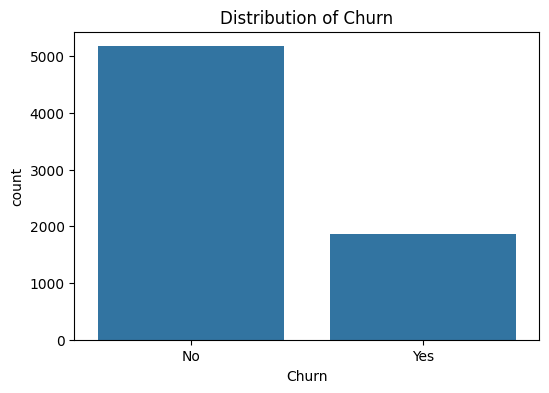

In [53]:

# Analyze the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

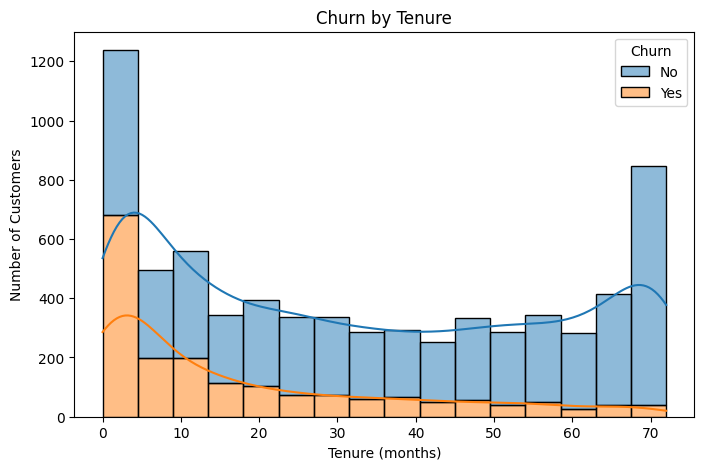

In [54]:
# Analyze the relationship between 'Churn' and 'tenure'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

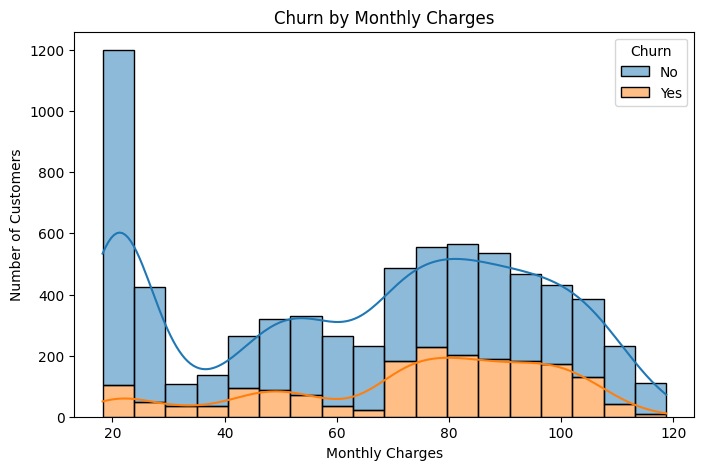

In [55]:
# Analyze the relationship between 'Churn' and 'MonthlyCharges'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()


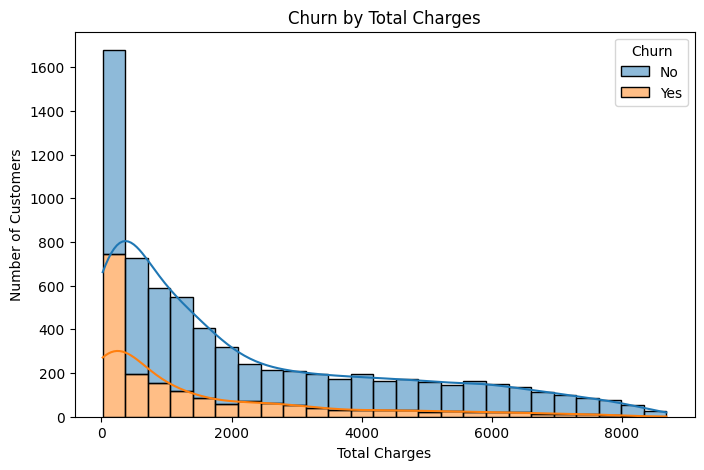

In [56]:
# Analyze the relationship between 'Churn' and 'TotalCharges'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Churn by Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()

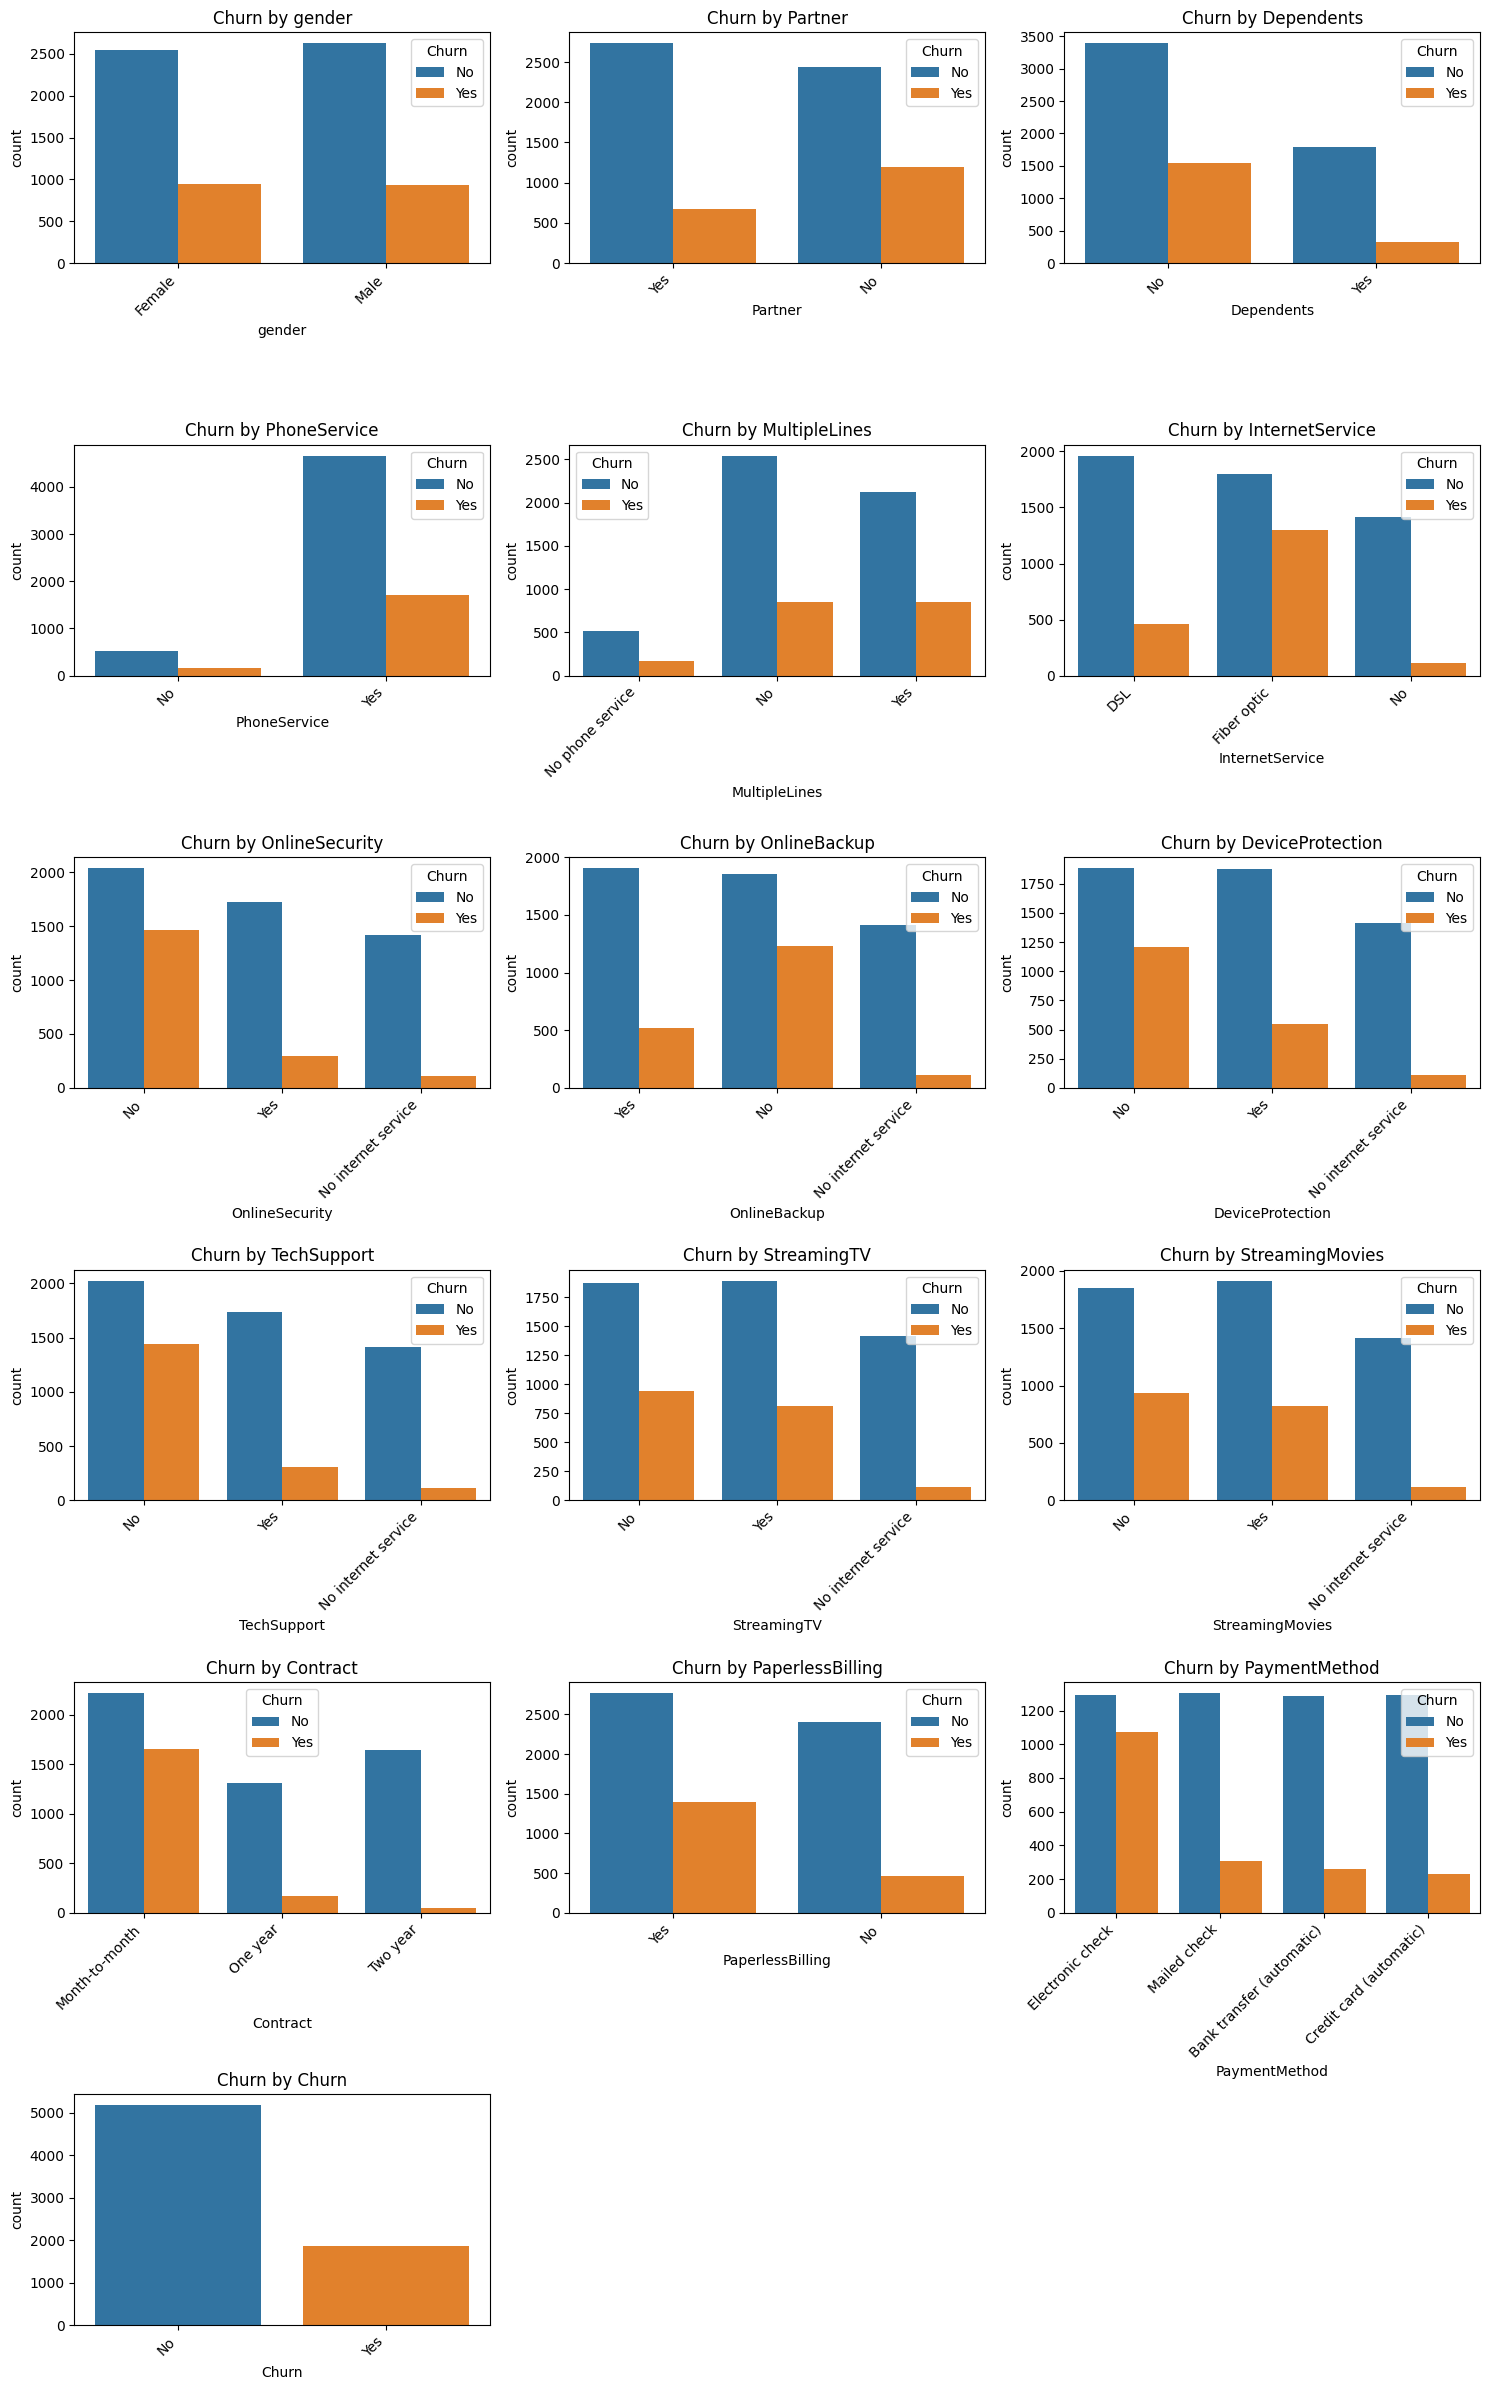

In [57]:
# Analyze categorical features and their relationship with Churn
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID') # Exclude customerID as it's an identifier
if 'Cluster' in categorical_cols:
    categorical_cols.remove('Cluster') # Exclude Cluster if it exists

# Determine the number of rows and columns for the grid
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols # Calculate the number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size based on grid dimensions

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1) # Create a subplot in the grid
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Inferences from Categorical Feature Plots

Analyzing the countplots showing the relationship between various categorical features and 'Churn' (Yes/No), we can make the following inferences:

*   **Gender:** There doesn't appear to be a significant difference in churn rate between male and female customers.
*   **Partner:** Customers with partners have a lower churn rate compared to those without partners.
*   **Dependents:** Similar to partners, customers with dependents tend to have a lower churn rate than those without dependents.
*   **PhoneService:** Customers with phone service have a slightly higher proportion of churn compared to those without phone service (though the number of customers without phone service is much smaller).
*   **MultipleLines:** Among customers with phone service, those with multiple lines have a slightly lower churn rate than those with a single line. Customers without phone service have a distinctly different churn distribution.
*   **InternetService:** Customers with Fiber Optic internet service have a significantly higher churn rate than those with DSL or no internet service.
*   **OnlineSecurity:** Customers who do not have online security have a much higher churn rate compared to those who do.
*   **OnlineBackup:** Customers who do not have online backup have a higher churn rate compared to those who do.
*   **DeviceProtection:** Customers who do not have device protection have a higher churn rate compared to those who do.
*   **TechSupport:** Customers who do not have tech support have a much higher churn rate compared to those who do.
*   **StreamingTV:** Customers who stream TV seem to have a slightly higher churn rate compared to those who don't stream TV or have no internet service.
*   **StreamingMovies:** Similar to streaming TV, customers who stream movies seem to have a slightly higher churn rate compared to those who don't stream movies or have no internet service.
*   **Contract:** Customers with Month-to-month contracts have a substantially higher churn rate than those with One year or Two year contracts.
*   **PaperlessBilling:** Customers with paperless billing have a higher churn rate than those without paperless billing.
*   **PaymentMethod:** Customers using Electronic check as their payment method have a notably higher churn rate compared to other payment methods like Mailed check, Bank transfer (automatic), and Credit card (automatic).

These visualizations clearly highlight several key factors associated with churn, particularly the type of internet service, the presence of additional security and support services, contract terms, and payment methods.

In [58]:
# Univariate analysis of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude numerical features that are essentially binary or identifiers if any
numerical_features_for_hist = [col for col in numerical_features if col not in ['SeniorCitizen', 'numAdminTickets', 'numTechTickets', 'Cluster']] # Exclude Cluster as it's a result of segmentation


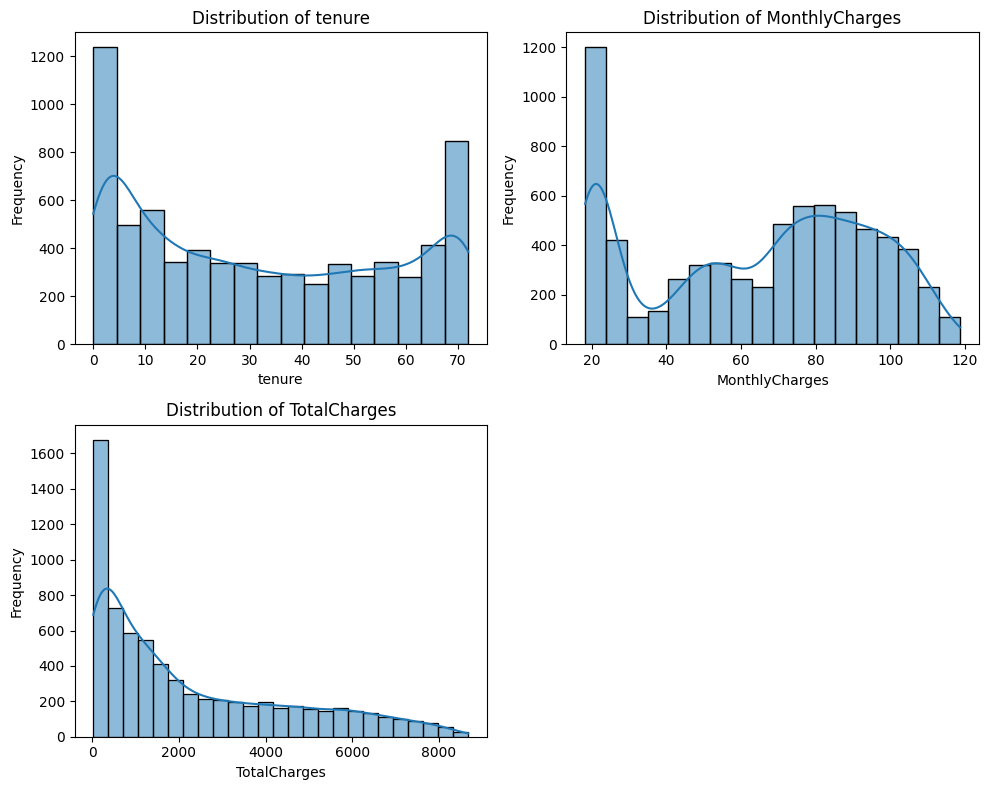

In [59]:
# Determine the number of rows and columns for the grid for numerical histograms
n_cols_num = 2 # Adjust as needed for numerical histograms
n_rows_num = (len(numerical_features_for_hist) + n_cols_num - 1) // n_cols_num # Calculate the number of rows needed

plt.figure(figsize=(n_cols_num * 5, n_rows_num * 4)) # Adjust figure size

for i, col in enumerate(numerical_features_for_hist):
    plt.subplot(n_rows_num, n_cols_num, i + 1) # Create a subplot
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout
plt.show()

In [60]:
# Univariate analysis of categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID') # Exclude customerID as it's an identifier
if 'Cluster' in categorical_cols:
    categorical_cols.remove('Cluster') # Exclude Cluster if it exists

### Univariate analysis of categorical features

In [61]:
# Determine the number of rows and columns for the grid
n_cols_cat = 3  # You can adjust the number of columns as needed for categorical plots
n_rows_cat = (len(categorical_cols) + n_cols_cat - 1) // n_cols_cat # Calculate the number of rows needed

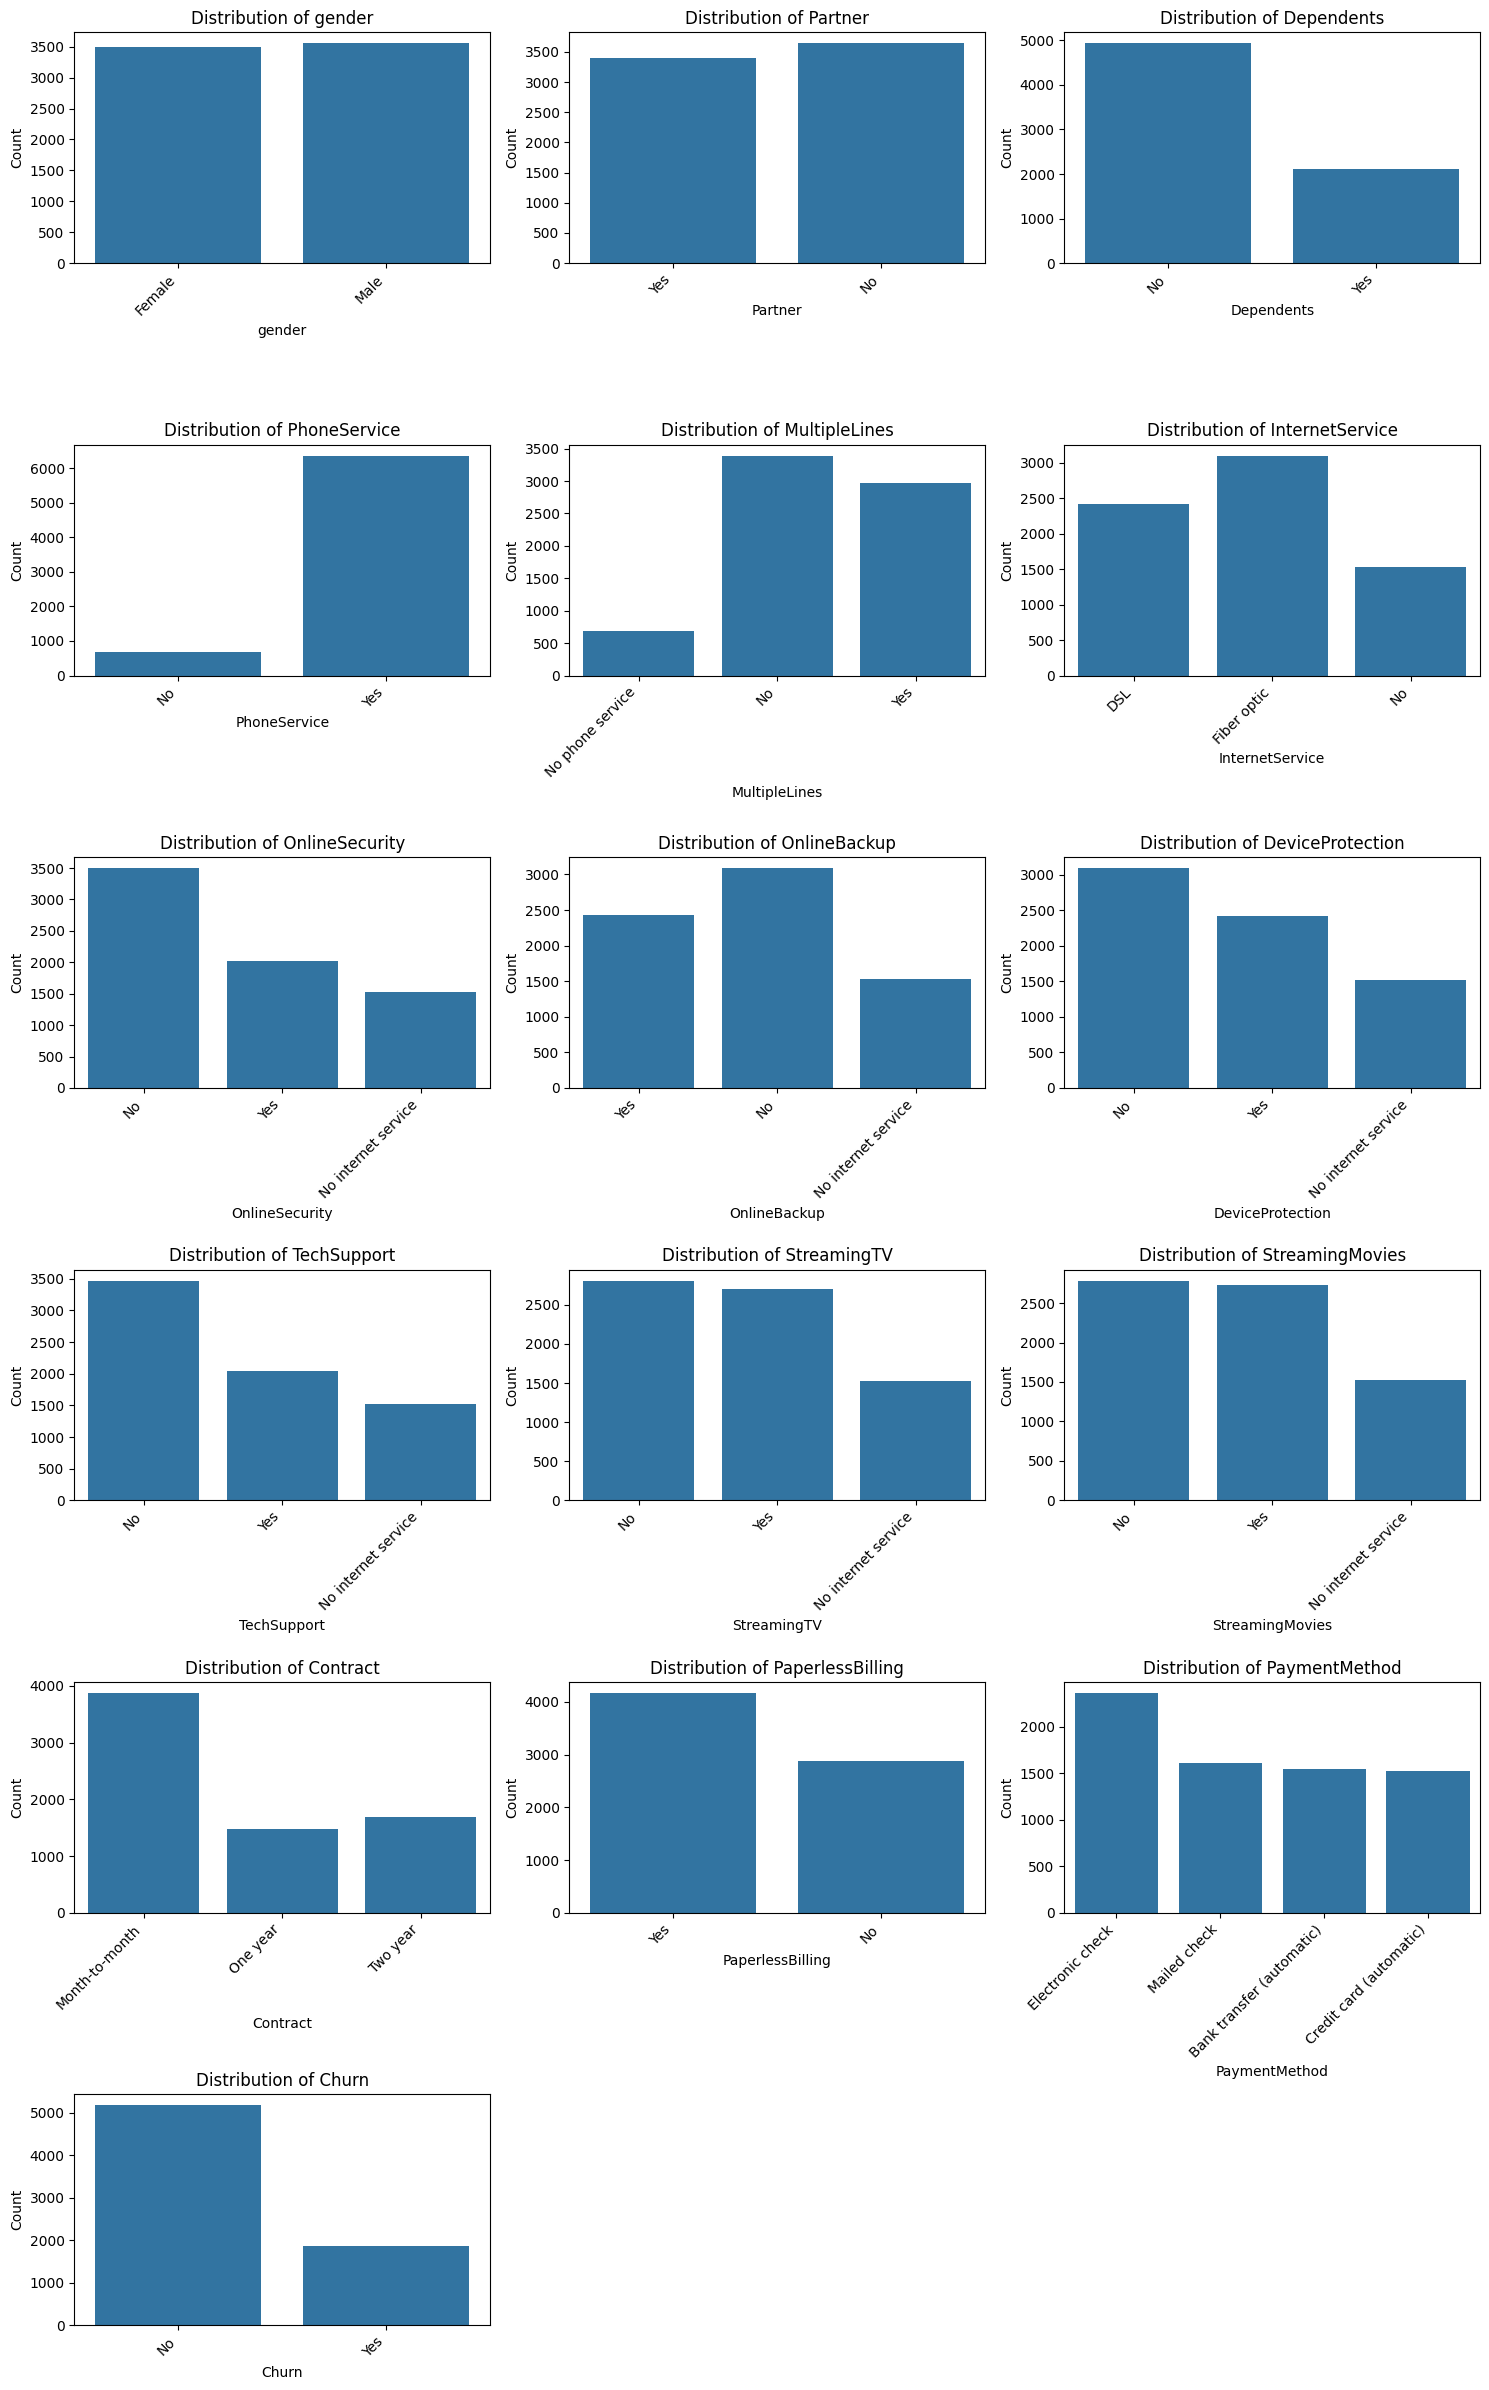

In [62]:
plt.figure(figsize=(n_cols_cat * 5, n_rows_cat * 4)) # Adjust figure size based on grid dimensions for categorical plots

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1) # Create a subplot in the grid
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Inferences from Additional Univariate Analysis

Based on the univariate analysis of the individual features:

**Numerical Features (Histograms):**

*   **tenure:** The distribution of tenure is skewed towards lower values, indicating a significant number of customers with shorter tenures. There are also peaks at higher tenures, suggesting a group of long-term customers.
*   **MonthlyCharges:** The distribution of monthly charges appears somewhat multimodal, with peaks at lower charges (likely for customers with fewer services or basic plans) and higher charges (for customers with more services or premium plans).
*   **TotalCharges:** The distribution of total charges is heavily skewed towards lower values, which is expected given the skewed tenure distribution. Newer customers with shorter tenures will naturally have lower total charges.
*   **AverageMonthlyCharge:** The distribution of average monthly charge shows a range of values, with some concentration at certain points, likely reflecting different service bundles or pricing tiers.

**Categorical Features (Countplots):**

*   **gender:** The distribution of gender is fairly balanced between Male and Female customers.
*   **Partner and Dependents:** There are more customers without partners and dependents than with them.
*   **PhoneService and PaperlessBilling:** A large majority of customers have phone service and paperless billing.
*   **MultipleLines:** Among customers with phone service, there are slightly more with no multiple lines than with multiple lines.
*   **InternetService:** Fiber optic is the most common internet service, followed by DSL, with a notable number of customers having no internet service.
*   **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies:** For most of these additional services, the largest category is 'No', indicating that a significant portion of customers do not subscribe to these services. There is also a category for 'No internet service', which is consistent across these plots.
*   **Contract:** The most frequent contract type is 'Month-to-month', followed by 'Two year' and then 'One year'.
*   **PaymentMethod:** Electronic check is the most common payment method, followed by Mailed check, Bank transfer (automatic), and Credit card (automatic).
*   **Churn:** The distribution of the target variable confirms the imbalance, with more customers in the 'No' churn category than the 'Yes' churn category.

This univariate analysis provides a deeper understanding of the individual characteristics of the customer base and the distribution of different service usages and contract types within the dataset.

In [63]:
# Analyze the relationship between numerical features and Churn using box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude features that are not suitable for box plots against churn
numerical_features_for_box = [col for col in numerical_features if col not in ['SeniorCitizen', 'numAdminTickets', 'numTechTickets', 'Cluster']] # Exclude Cluster as it's a result of segmentation


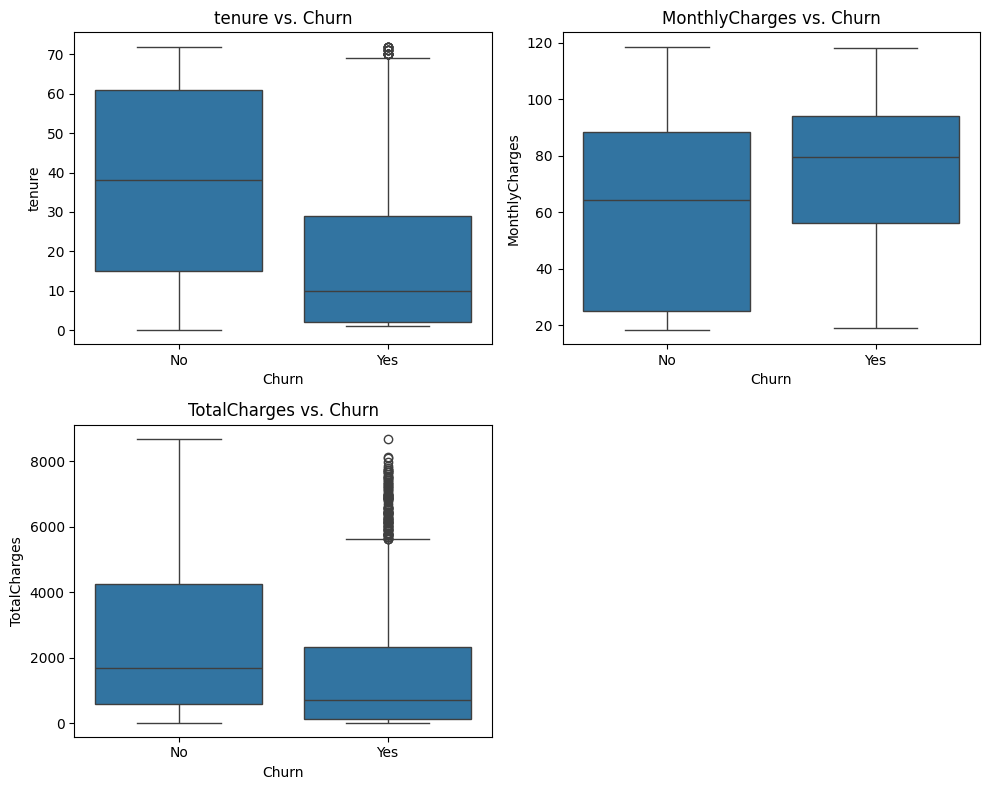

In [64]:
# Determine the number of rows and columns for the grid for box plots
n_cols_box = 2 # Adjust as needed for box plots
n_rows_box = (len(numerical_features_for_box) + n_cols_box - 1) // n_cols_box # Calculate the number of rows needed

plt.figure(figsize=(n_cols_box * 5, n_rows_box * 4)) # Adjust figure size

for i, col in enumerate(numerical_features_for_box):
    plt.subplot(n_rows_box, n_cols_box, i + 1) # Create a subplot
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout() # Adjust layout
plt.show()

In [72]:
# Analyze relationships between numerical features using a pair plot
# Selecting a subset of numerical features for the pair plot for clarity
numerical_features_for_pairplot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
# Convert Churn back to object for pairplot hue
df_pairplot = df[numerical_features_for_pairplot].copy()
df_pairplot['Churn_numeric'] = df_pairplot['Churn'].map({'No': 0, 'Yes': 1})

In [73]:
df_pairplot

,tenure,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,1,29.85,29.85,No,0
1,34,56.95,1889.50,No,0
2,2,53.85,108.15,Yes,1
3,45,42.30,1840.75,No,0
4,2,70.70,151.65,Yes,1
...,...,...,...,...,...
7038,24,84.80,1990.50,No,0
7039,72,103.20,7362.90,No,0
7040,11,29.60,346.45,No,0
7041,4,74.40,306.60,Yes,1



Analyzing relationships between numerical features with a pair plot:


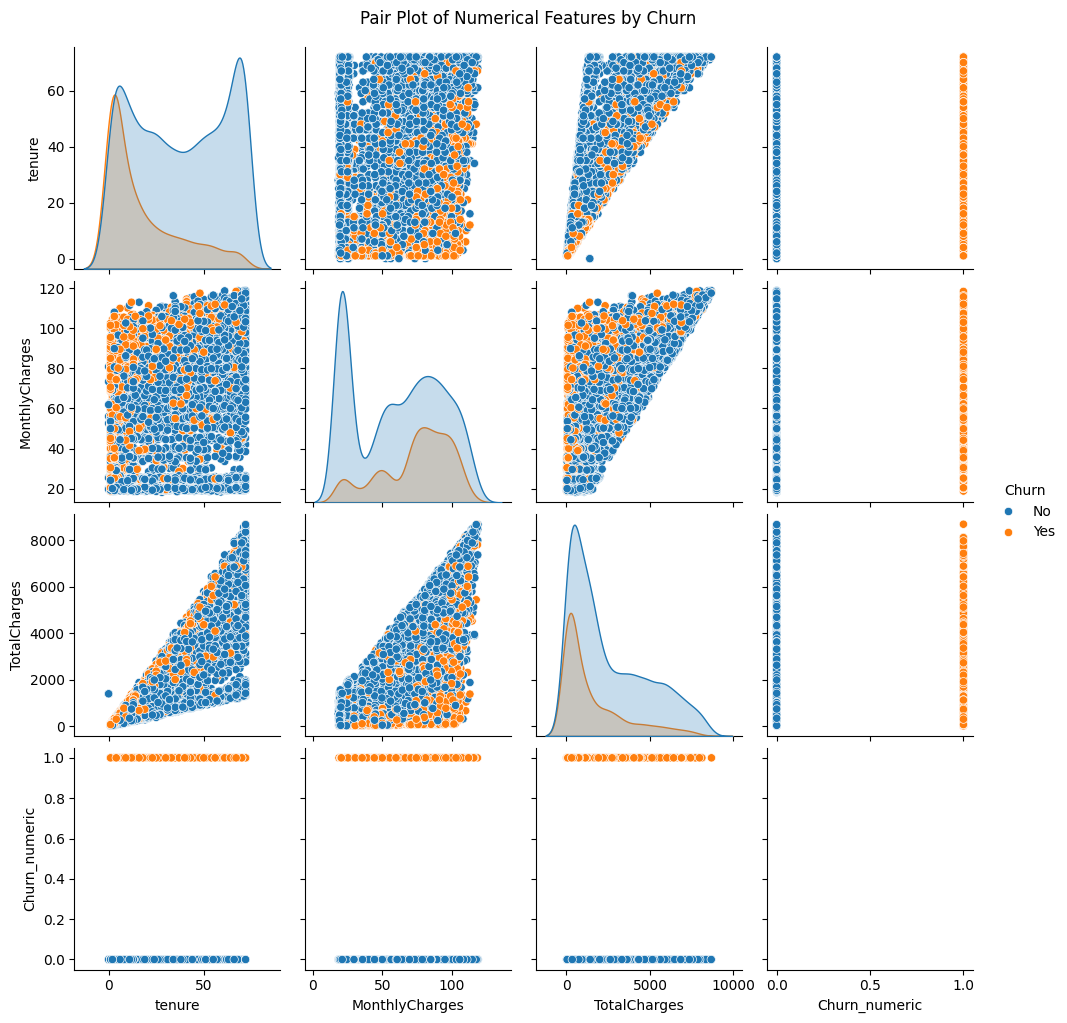

In [74]:
print("\nAnalyzing relationships between numerical features with a pair plot:")
sns.pairplot(df_pairplot, hue='Churn', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02) # Adjust title position
plt.show()

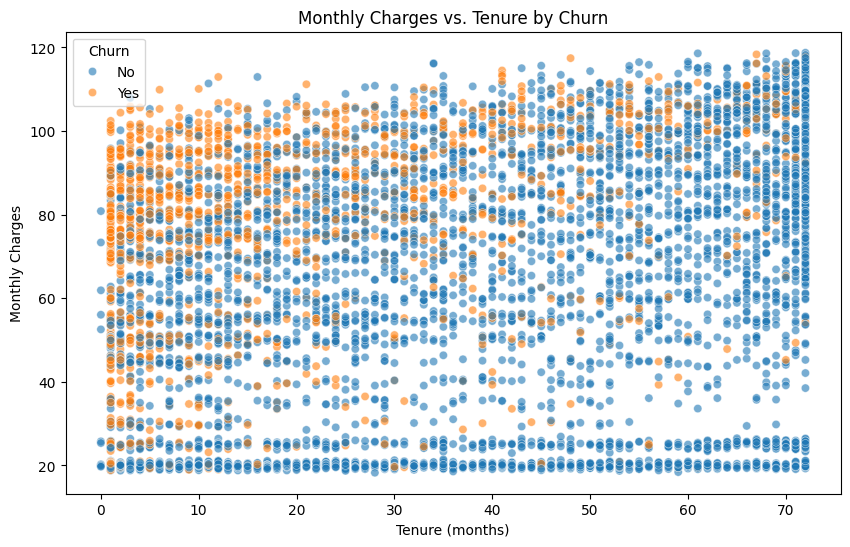

In [75]:


# You can also create specific scatter plots if needed, e.g., MonthlyCharges vs. Tenure colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df_pairplot, alpha=0.6)
plt.title('Monthly Charges vs. Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()

## Inferences from Scatter Plots and Pair Plot

Analyzing the scatter plots and the pair plot of numerical features colored by Churn in cell `rHrBaCtVaV8D`, we can make the following inferences:

**General Observations from Pair Plot:**

*   The diagonal of the pair plot shows the kernel density estimate (KDE) of each numerical feature, separated by Churn. This reinforces the univariate analysis findings regarding the distributions of `tenure`, `MonthlyCharges`, `TotalCharges`, and `AverageMonthlyCharge` and how they differ between churning and non-churning customers.
*   The off-diagonal plots show scatter plots of each pair of numerical features, colored by Churn. These plots help visualize the relationships between pairs of features and how these relationships vary for customers who churned versus those who did not.

**Specific Inferences from Scatter Plots:**

*   **tenure vs. MonthlyCharges:** The scatter plot of `MonthlyCharges` vs. `tenure` shows a spread of customers across different combinations of tenure and monthly charges. We can observe that:
    *   Churned customers (in orange/red) are more concentrated in the lower tenure range, regardless of their monthly charges.
    *   Non-churned customers (in blue) are more spread out across all tenure values, with a significant concentration at higher tenures.
    *   There seems to be a pattern where customers with high monthly charges and low tenure have a higher tendency to churn.
*   **tenure vs. TotalCharges:** This plot shows a strong positive correlation between `tenure` and `TotalCharges`, which is expected as `TotalCharges` is accumulated over the tenure. The plot also highlights:
    *   Churned customers are predominantly in the lower left portion of the plot, indicating low tenure and low total charges.
    *   Non-churned customers are more spread out, extending to higher values of both tenure and total charges.
*   **MonthlyCharges vs. TotalCharges:** This plot also shows a positive correlation. Customers with higher monthly charges tend to have higher total charges, especially at higher tenures (which is implicitly represented).
    *   Churned customers in this plot are more scattered but appear to be more prevalent among those with higher monthly charges, particularly if their total charges are relatively low (suggesting recent high-cost subscriptions).
*   **AverageMonthlyCharge vs. other features:** The plots involving `AverageMonthlyCharge` provide insights into how the average cost per month relates to tenure, monthly charges, and total charges. The relationship between `AverageMonthlyCharge` and `MonthlyCharges` is strong, as expected. The plots also show how customers with different average monthly charges are distributed across different tenures and total charges, and how this relates to churn.

**Inferences from Pair Plot (Overall):**

*   The pair plot collectively reinforces the findings from the individual scatter plots and provides a quick overview of the relationships between all pairs of selected numerical features.
*   The separation of churned and non-churned customers in various scatter plots (especially those involving tenure) visually confirms that these numerical features are important discriminators for churn.
*   The plots suggest that customers who churn often have shorter tenures and lower total charges, while their monthly charges can vary.
